In [2]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.dm as dm
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils

from apra_pop_models.imshows import *

pupil_diam = 10*u.mm
wavelength_c = 650e-9*u.m




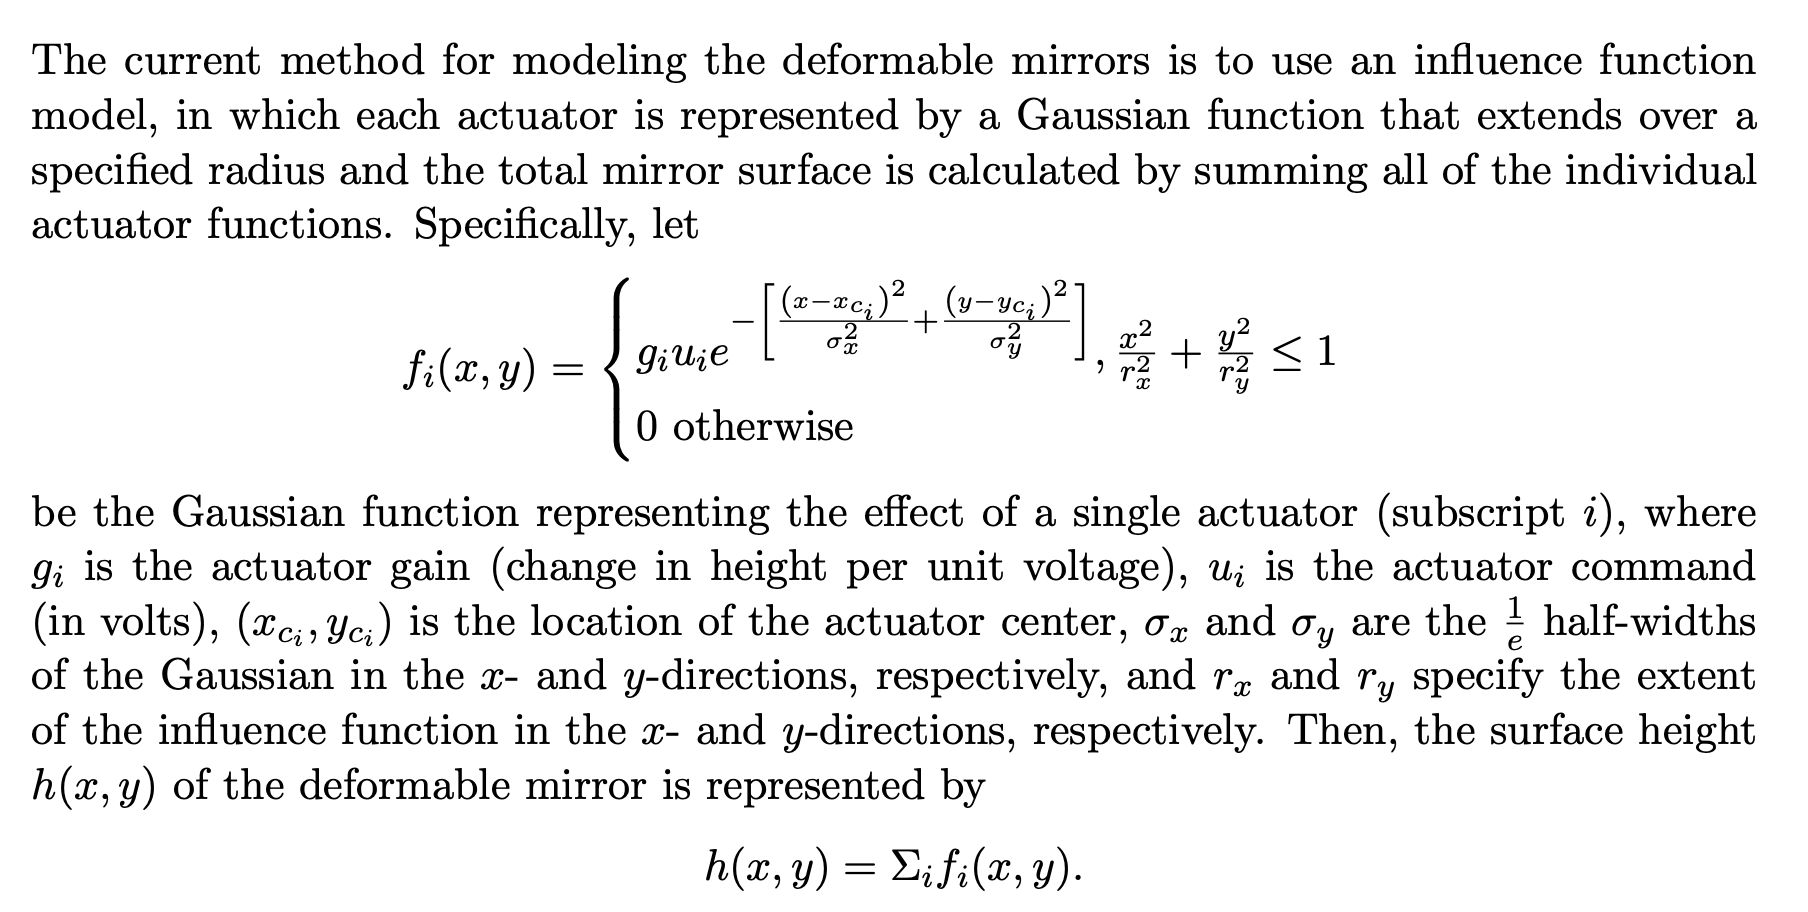

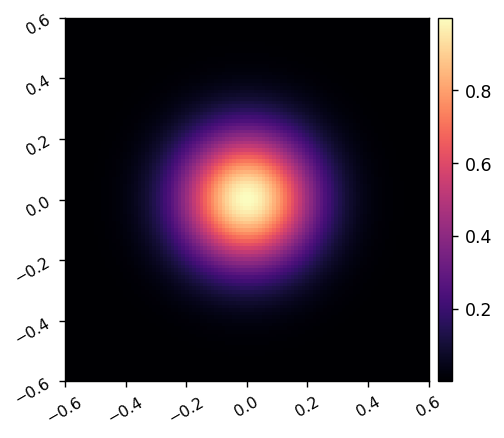

In [4]:
reload(dm)
sampling = 25
act_spacing = 300e-6*u.m
inf_fun, _ = dm.make_gaussian_inf_fun(act_spacing=act_spacing, sampling=sampling, coupling=0.15)
imshow1(inf_fun, pxscl=act_spacing.to(u.mm)/sampling)

Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


AttributeError: 'tuple' object has no attribute 'get'

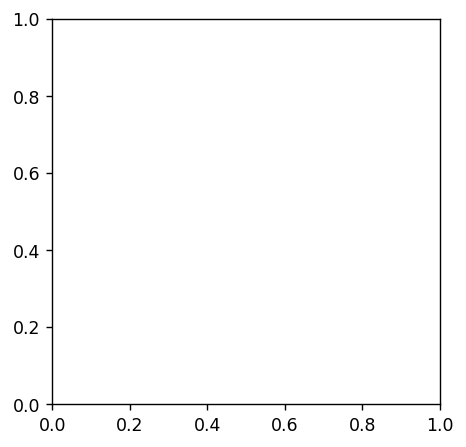

In [5]:
reload(dm)
DM = dm.DeformableMirror(act_spacing=act_spacing, inf_fun=inf_fun, inf_sampling=sampling)
surf = DM.get_surface()
imshow1(surf)

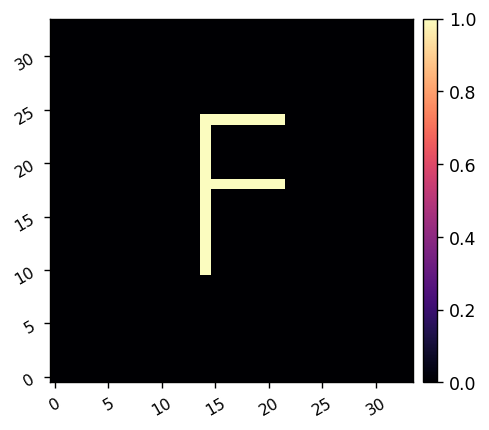

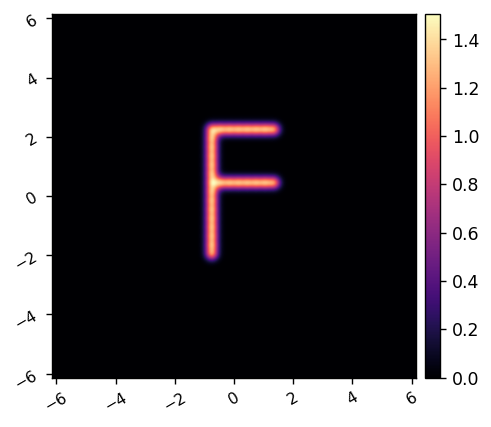

In [32]:
command = xp.zeros((DM.Nact, DM.Nact))
command[10:24,14] = 1
command[24,14:22] = 1
command[18,14:22] = 1
imshow1(command)
DM.command = command
surf = DM.get_surface()
imshow1(surf, pxscl=act_spacing.to(u.mm)/25)

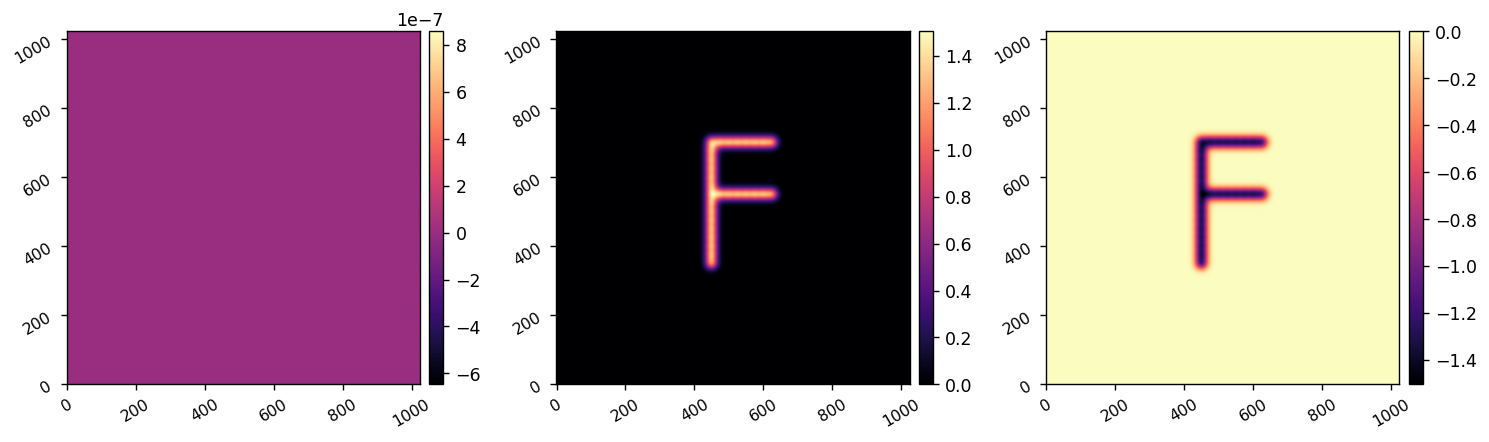

In [33]:
test_result = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_experimental_result.csv', delimiter=',')
diff = test_result - ensure_np_array(surf)
imshow3(test_result, surf, diff)


In [33]:
np.savetxt("test_command.csv", ensure_np_array(command), delimiter=",")
np.savetxt("test_command_result.csv", ensure_np_array(surf), delimiter=",")

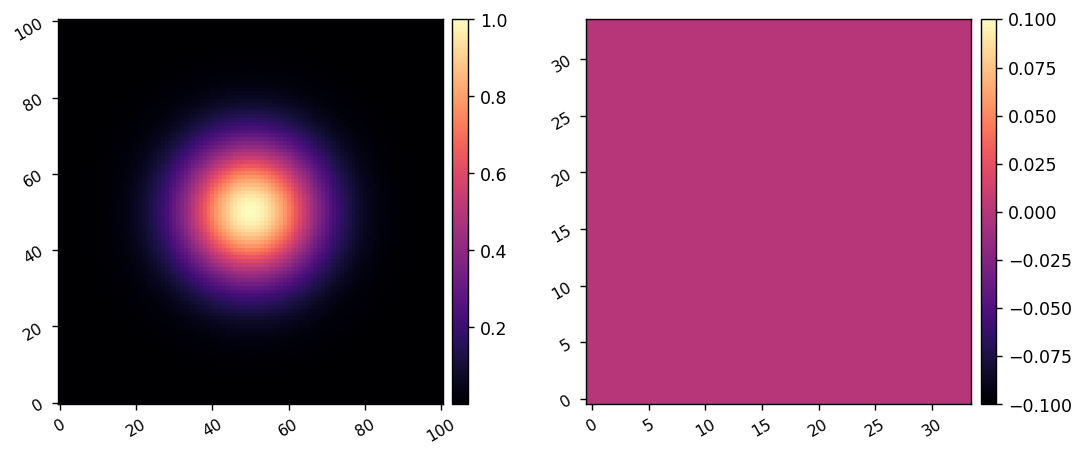

4.04


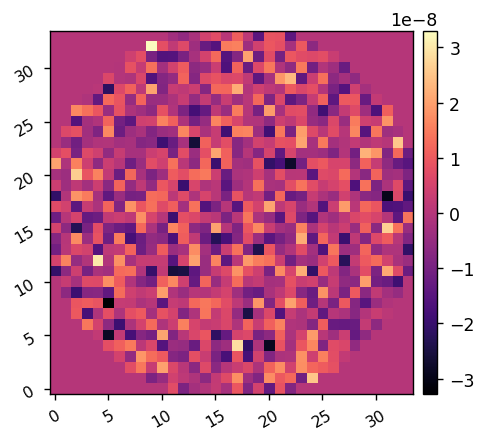

4.0 25
851 951


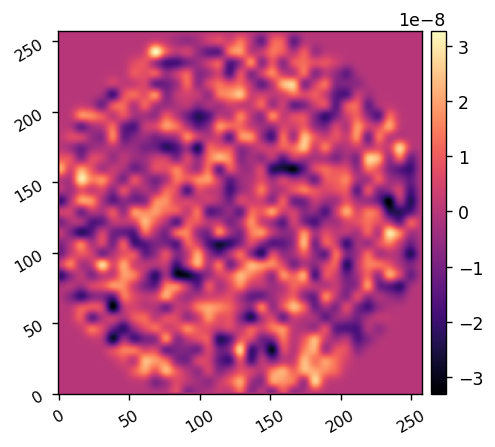

In [102]:
reload(dm)
DM = dm.DeformableMirror()
imshow2(DM.inf_fun, DM.command)

DM.actuators = xp.random.randn(DM.Nacts)*1e-8
imshow1(DM.command)

dmsurf = DM.get_surface(256)
imshow1(dmsurf)

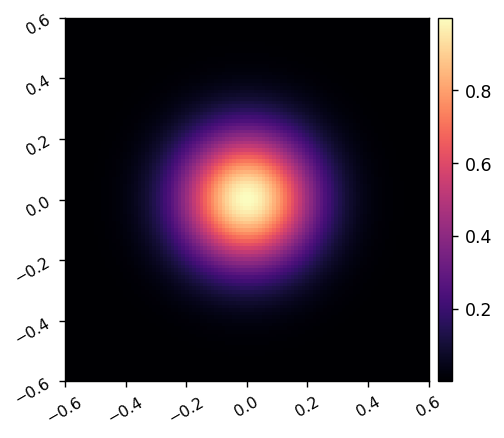

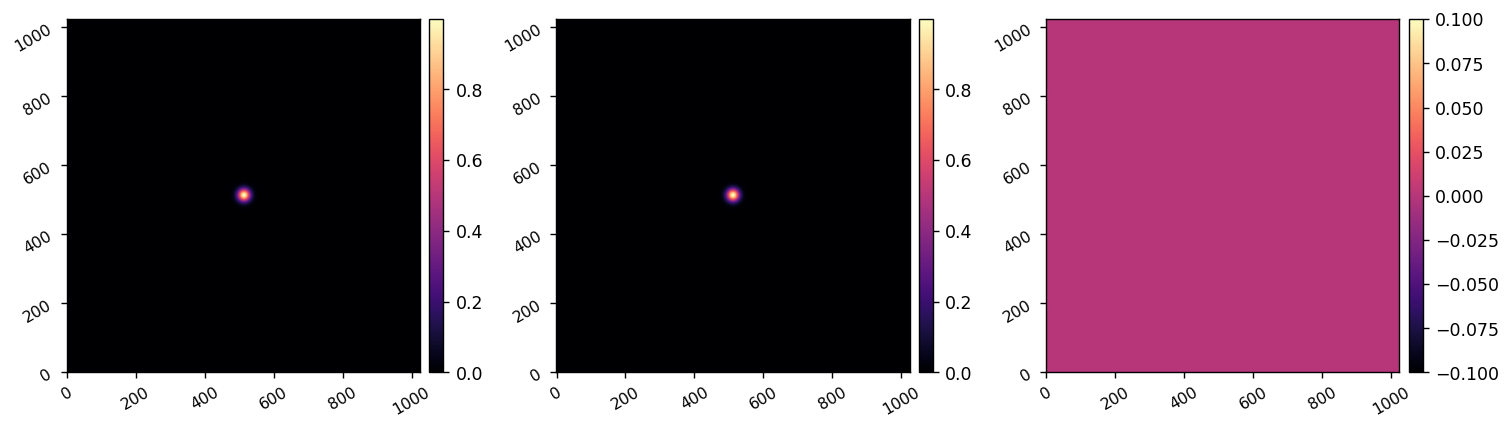

In [38]:
reload(dm)
sampling = 25
act_spacing = 300e-6*u.m
inf_fun, _ = dm.make_gaussian_inf_fun(act_spacing=act_spacing, sampling=sampling, coupling=0.15)
imshow1(inf_fun, pxscl=act_spacing.to(u.mm)/sampling)

test_inf_fun = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_inf_func.csv', delimiter=',')
inf_fun = xp.roll(utils.pad_or_crop(inf_fun, 1024), (0,0), axis=(0,1))
diff = test_inf_fun - ensure_np_array(inf_fun)
imshow3(test_inf_fun, inf_fun, diff)

Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


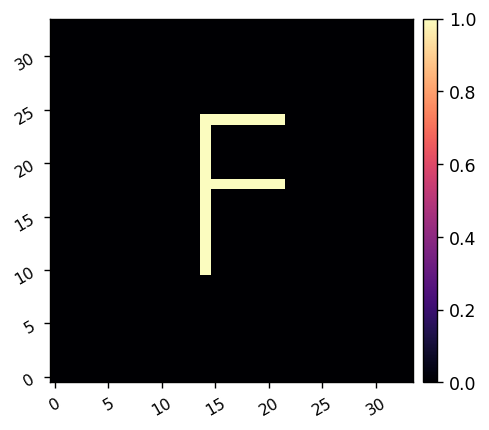

In [6]:
reload(dm)
DM = dm.DeformableMirror(act_spacing=act_spacing, inf_fun=inf_fun, inf_sampling=sampling)
command = xp.zeros((DM.Nact, DM.Nact))
command[10:24,14] = 1
command[24,14:22] = 1
command[18,14:22] = 1
DM.command = command
imshow1(command)

# surf, Mx, My = DM.get_surface()
# np.savetxt("test_Mx.csv", ensure_np_array(Mx), delimiter=",")
# np.savetxt("test_My.csv", ensure_np_array(My), delimiter=",")

# surf, mft_command = DM.get_surface()
# np.savetxt("test_mft_command.csv", ensure_np_array(mft_command), delimiter=",")

surf, fourier_inf_fun, fourier_surf = DM.get_surface()
np.savetxt("test_fourier_inf_fun.csv", ensure_np_array(fourier_inf_fun), delimiter=",")
np.savetxt("test_fourier_surf.csv", ensure_np_array(fourier_surf), delimiter=",")


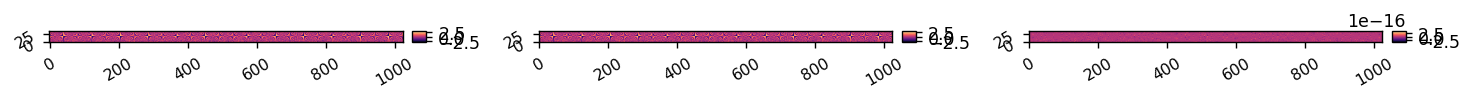

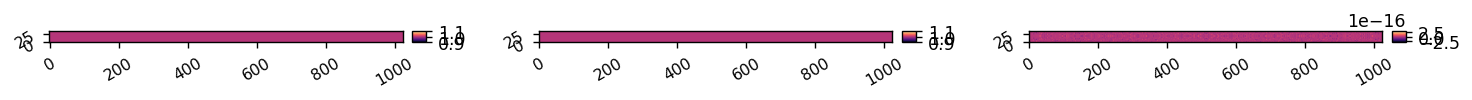

In [22]:
my_mx = np.loadtxt('test_My.csv', delimiter=',', dtype=np.complex128)
test_mx = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/my.csv', delimiter=',', dtype=np.complex128)

diff = np.angle(my_mx) - np.angle(test_mx)
imshow3(np.angle(my_mx), np.angle(test_mx), diff)

diff = np.abs(my_mx) - np.abs(test_mx)
imshow3(np.abs(my_mx), np.abs(test_mx), diff)

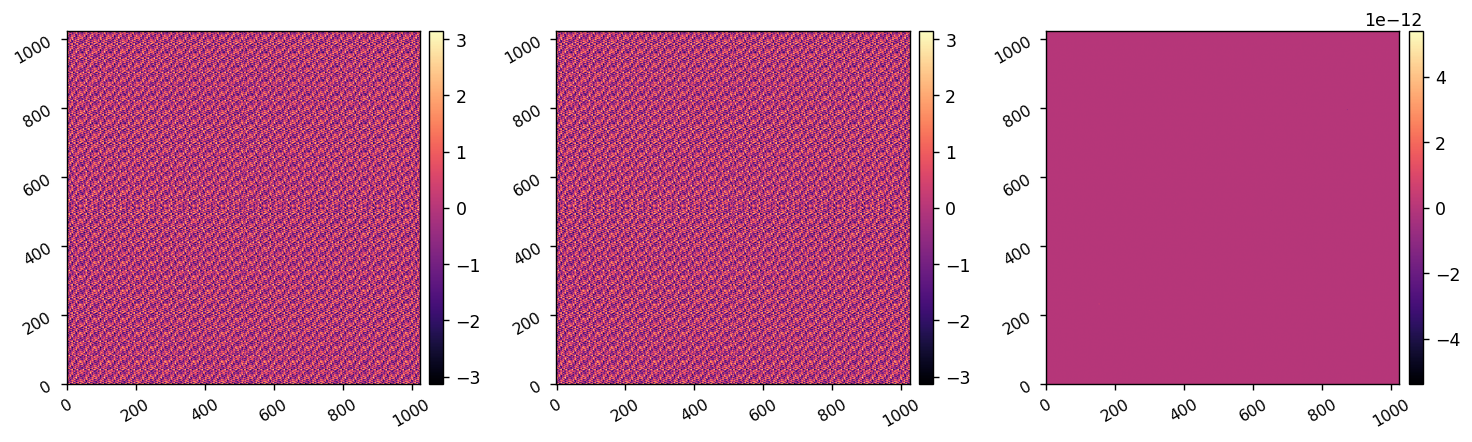

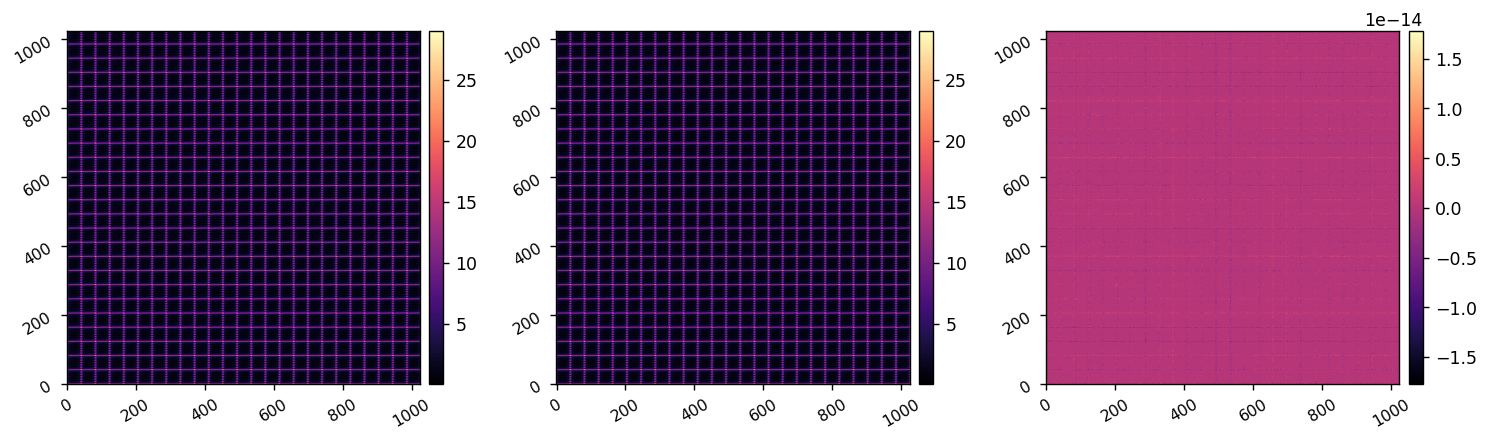

In [27]:
my_mx = np.loadtxt('test_mft_command.csv', delimiter=',', dtype=np.complex128)
test_mx = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_mft_command.csv', delimiter=',', dtype=np.complex128)

diff = np.angle(my_mx) - np.angle(test_mx)
imshow3(np.angle(my_mx), np.angle(test_mx), diff)

diff = np.abs(my_mx) - np.abs(test_mx)
imshow3(np.abs(my_mx), np.abs(test_mx), diff)

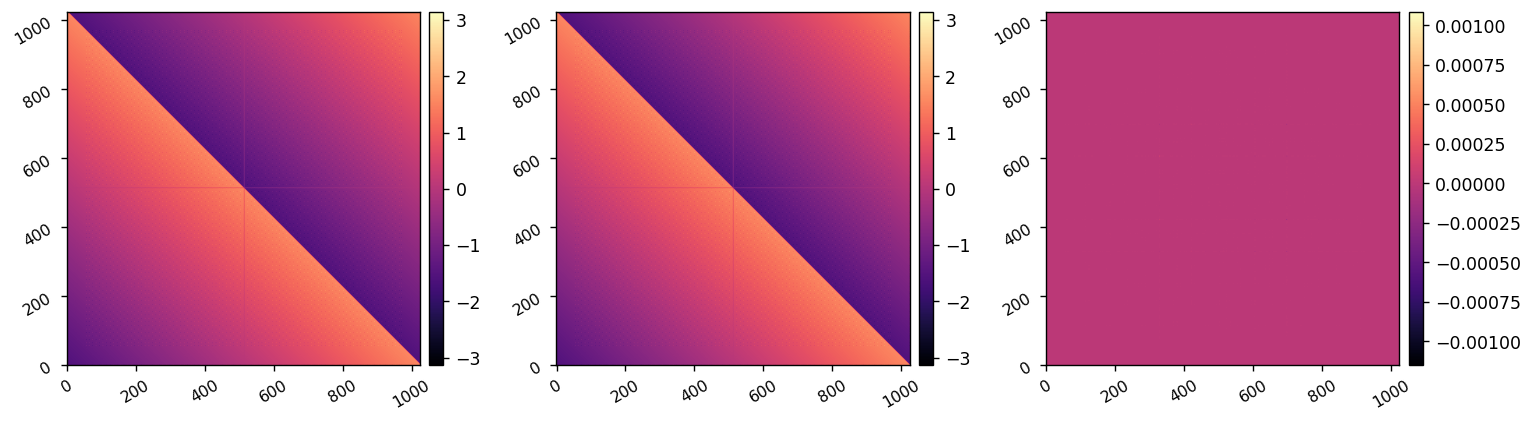

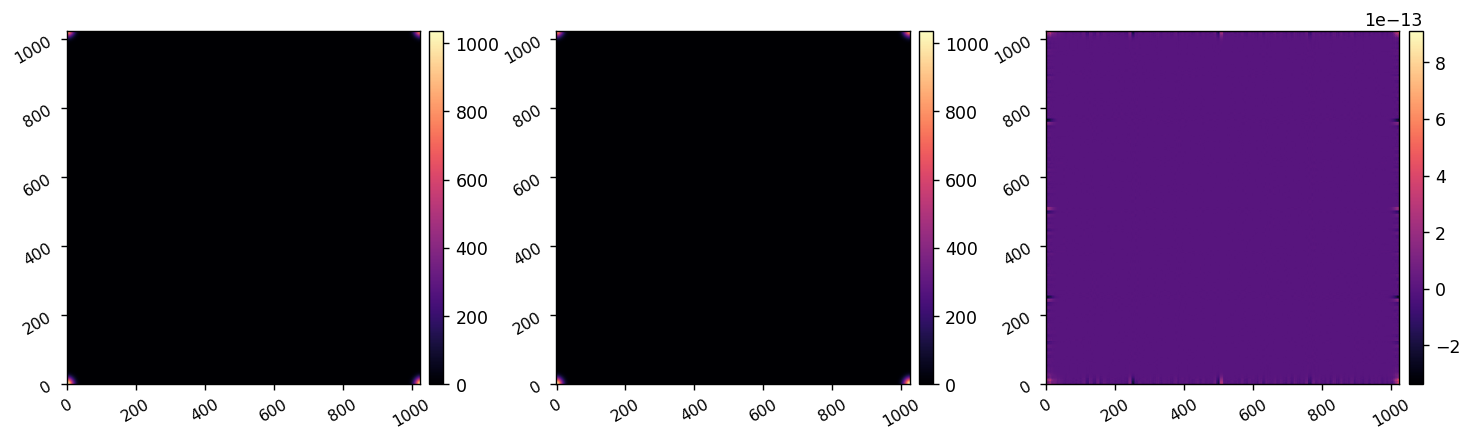

In [11]:
my_mx = np.loadtxt('test_fourier_inf_fun.csv', delimiter=',', dtype=np.complex128)
test_mx = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_four_inf_command.csv', delimiter=',', dtype=np.complex128)

diff = np.angle(my_mx) - np.angle(test_mx)
imshow3(np.angle(my_mx), np.angle(test_mx), diff)

diff = np.abs(my_mx) - np.abs(test_mx)
imshow3(np.abs(my_mx), np.abs(test_mx), diff)

In [13]:
1024**2*0.04

41943.04

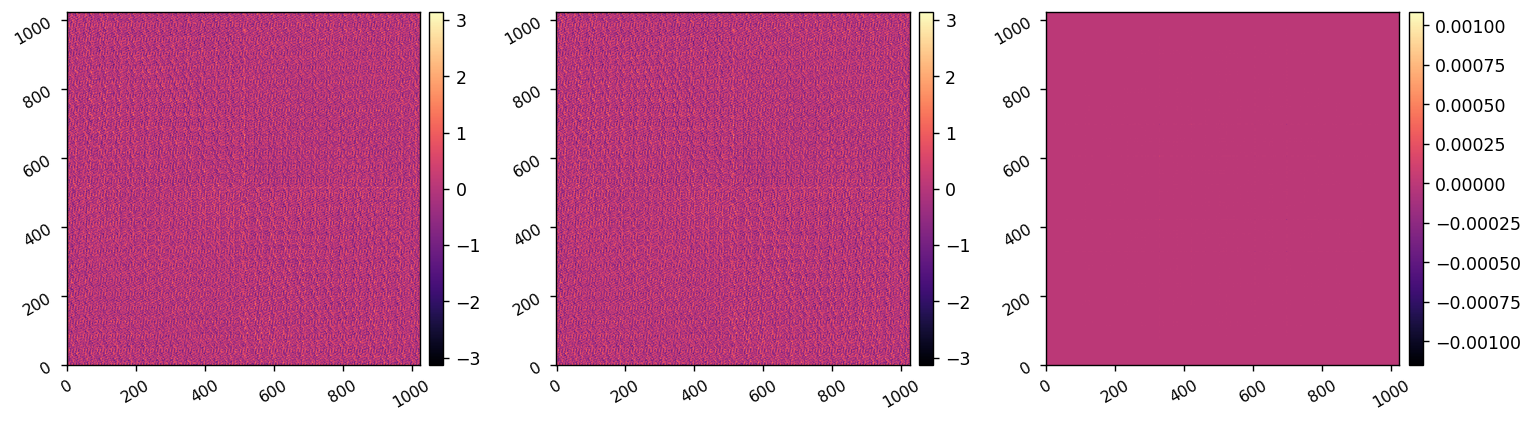

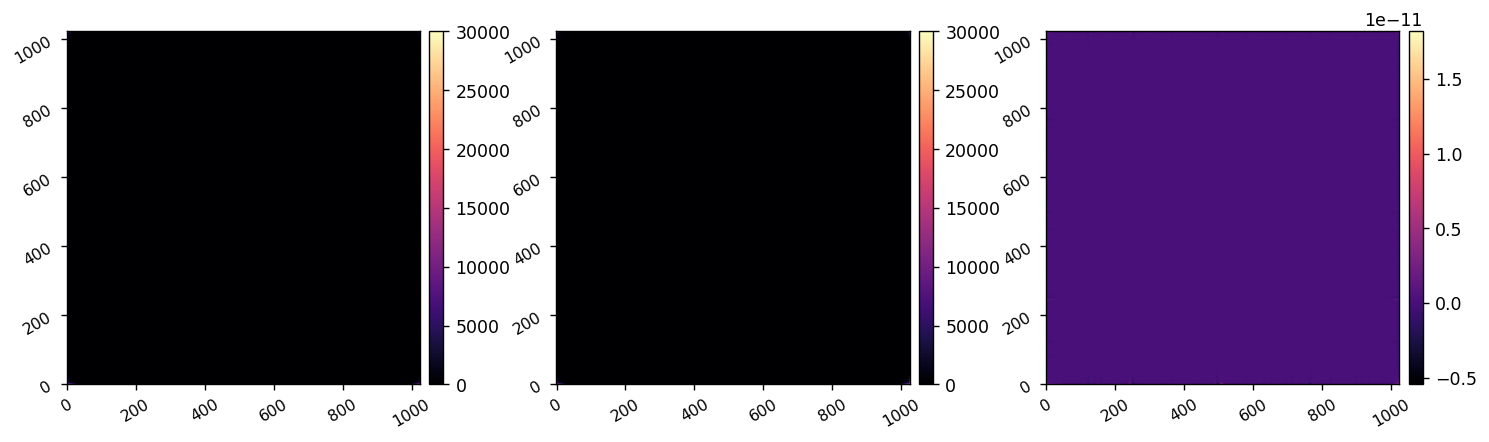

In [16]:
my_mx = np.loadtxt('test_fourier_surf.csv', delimiter=',', dtype=np.complex128)
test_mx = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_four_surf.csv', delimiter=',', dtype=np.complex128)

diff = np.angle(my_mx) - np.angle(test_mx)
imshow3(np.angle(my_mx), np.angle(test_mx), diff)

diff = np.abs(my_mx) - np.abs(test_mx)
imshow3(np.abs(my_mx), np.abs(test_mx), diff)

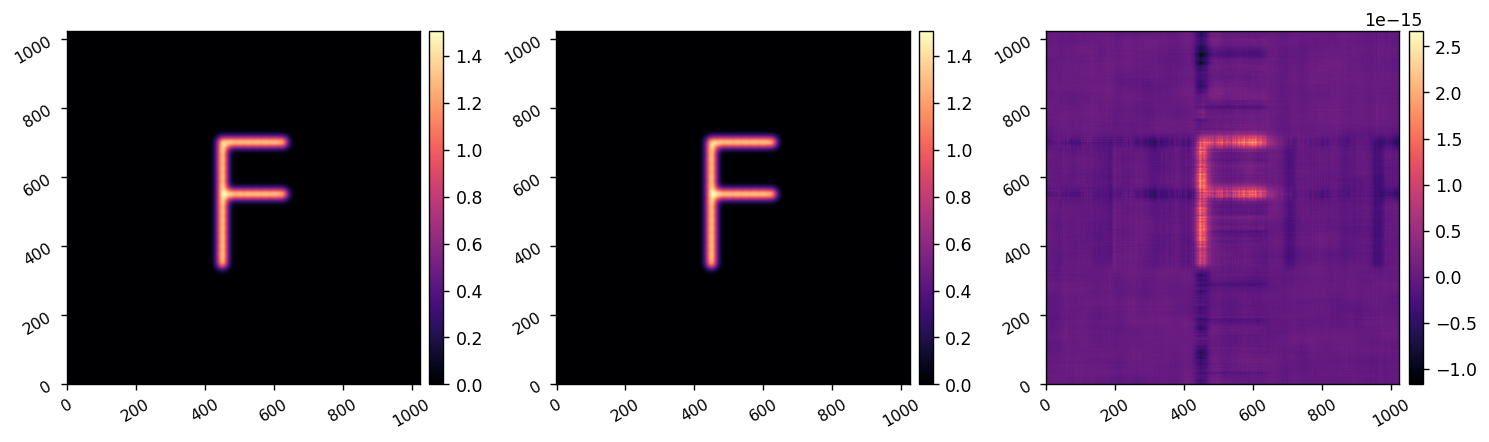

In [18]:
my_mx = np.loadtxt('test_command_result.csv', delimiter=',')
test_mx = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_result.csv', delimiter=',')

diff = my_mx - test_mx
imshow3(my_mx, test_mx, diff)

In [40]:
def rmsd(vector1,vector2):
    total = 0
    total_for_avg = 0
    for i in range(len(vector1)):
        total += (vector1[i]-vector2[i])*np.conjugate(vector1[i]-vector2[i])
        total_for_avg += np.abs(vector1[i]-vector2[i])
        #if i == 0 or i == 1 or i ==3:
            #print((vector1[i]-vector2[i])**2)
    rms_error = np.sqrt(total / len(vector1))
    avg_error = total_for_avg/len(vector1)
    return rms_error, avg_error

vector_data = my_mx.flatten()
np_out_2D_vector = test_mx.flatten()
rms_error_1 = rmsd(vector_data,np_out_2D_vector)
print(f"rms_error is {rmsd(vector_data,np_out_2D_vector)[0]}")
print(f"avg_error pixel-wise is {rmsd(vector_data,np_out_2D_vector)[1]}")

rms_error is (2.050810964601256e-14+0j)
avg_error pixel-wise is 6.453879862885147e-15
